In [19]:
import nltk
from collections import Counter
import glob
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Paths for all the different corpora
folderpaths = ['../Corpora/AnxietyMeditations/', '../Corpora/SleepMeditations/',
               '../Corpora/LearningAndGrowthMeditations/', '../Corpora/MorningMeditations/']

#array to store the text of each file 
corpus = []
text2 = ""

for folder in folderpaths:
    if folder == '../Corpora/AnxietyMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text
    elif folder == '../Corpora/SleepMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text
    elif folder == '../Corpora/LearningAndGrowthMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text
    elif folder == '../Corpora/MorningMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
                text2 += text

newStopWords = ['[', ']', '`', '#', '$',
                '(', ')', "Music", ':', "....", "--", ",", "''", '`', '"']
stopwords = set(stopwords.words('english') +
                newStopWords + list(string.punctuation))

# Tokenizing by word and filtering stopwords
all_tokens = [w for w in word_tokenize(text2.lower()) if not w in stopwords]

In [20]:
import nltk
from nltk.tokenize import word_tokenize

# Preprocess the text data
tokenized_corpus = []
for text in corpus:
    # Tokenize and lowercase
    tokens = [w for w in word_tokenize(text.lower()) if not w in stopwords]
    tokenized_corpus.append(tokens)


In [21]:
import os
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
# Preprocess the text data
tokenized_corpus = []
for text in corpus:
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokenized_corpus.append(tokens)

context_windows = []
window_size = 4  # Size of the context window

for sentence in tokenized_corpus:
    sentence_length = len(sentence)
    for i in range(sentence_length):
        # Extract the target word
        target_word = sentence[i]

        # Extract the context words within the window size
        context_words = []
        for j in range(max(0, i - window_size), min(sentence_length, i + window_size + 1)):
            if j != i:
                context_words.append(sentence[j])

        # Append the target word and its context words as a tuple
        # Convert context_words to tuple
        context_windows.append((target_word, tuple(context_words)))

# Train the Word2Vec model
model = Word2Vec(context_windows, window=5,
                 min_count=10, sg=0)  # CBOW approach

# Accessing trained word vectors
word_vector = model.wv['breathe']  # Get the word vector for a specific word
print(word_vector)

[-0.02689126  0.05951508  0.01030723  0.12481487  0.0469645  -0.0666498
  0.08802678  0.04920806 -0.09466519 -0.02355417  0.0028399  -0.10654013
  0.0165463  -0.03453523  0.01267398  0.07055035  0.01301358 -0.09311492
 -0.02011583 -0.22697063 -0.00338847  0.10760061  0.09811094 -0.07731381
 -0.01128751  0.0799052  -0.06011355 -0.01352161 -0.11168689  0.00523582
  0.08319005  0.03572361  0.06021792  0.0038247  -0.1035966   0.10533227
 -0.00599715  0.01201892 -0.05177635 -0.11717309  0.10601177 -0.00972696
 -0.01905306 -0.06226148  0.07436036 -0.03102636 -0.08398519  0.06072127
  0.0920127   0.01460768 -0.00093295 -0.00449377  0.03349411  0.01595629
 -0.06541895  0.04694902 -0.00382415 -0.07452588 -0.01621517 -0.03060466
  0.0137903   0.04862916  0.08085921  0.0274645  -0.04836993  0.03405305
 -0.1097357   0.01136489 -0.0945516  -0.0239206  -0.00498235  0.0782158
  0.01721099 -0.01789301  0.01401936 -0.03816321  0.03806767 -0.10882018
 -0.04010782 -0.05996656 -0.01651835 -0.05498167 -0.0

In [22]:
import os
import nltk
from gensim.models import Word2Vec

# Define the directory containing the text files
directory = "./txt Files/"

all_vectors = { 'sight': [], 'smell': [], 'sound': [], 'taste': []
, 'touch': []}

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "r") as f:
            text = f.read()
            words = nltk.word_tokenize(text)
            for word in words:
                try:
                    word_vector = model.wv[word.lower()]
                    all_vectors[filename[:-4]].append(word_vector)
                    # print(f"Word: {word}\nVector: {word_vector}\n")
                except KeyError:
                    continue
                    # print(f"Word '{word}' not in vocabulary.\n")

# print(len(all_vectors['sight']))
# print(len(all_vectors['sight']))


In [23]:
import numpy as np
from scipy.spatial.distance import cosine

for key in all_vectors.keys(): 
    # Calculate the pairwise cosine similarity distance between each row in the matrix
    sight_len = len(all_vectors[key])
    distances = np.zeros((sight_len, sight_len))
    for i in range(sight_len):
        for j in range(i+1, sight_len):
            distances[i][j] = cosine(all_vectors[key][i], all_vectors[key][j])
            distances[j][i] = distances[i][j]

    # Print the resulting distance matrix
    # distances = distances[:10, :10]
    print(distances.shape)
distances
# Normalize the matrix to the range 0-1
# normalized_distance = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

(140, 140)
(70, 70)
(91, 91)
(61, 61)
(121, 121)


array([[0.        , 1.20222148, 0.00431818, ..., 1.13929485, 1.20959038,
        1.03295657],
       [1.20222148, 0.        , 1.2058554 , ..., 1.02568272, 0.97932871,
        0.98118716],
       [0.00431818, 1.2058554 , 0.        , ..., 1.14855289, 1.21767691,
        1.03117667],
       ...,
       [1.13929485, 1.02568272, 1.14855289, ..., 0.        , 0.89936873,
        1.05624234],
       [1.20959038, 0.97932871, 1.21767691, ..., 0.89936873, 0.        ,
        0.85870966],
       [1.03295657, 0.98118716, 1.03117667, ..., 1.05624234, 0.85870966,
        0.        ]])

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

dist_matrix = pd.DataFrame(distances)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.000000,1.202221,0.004318,0.010145,1.006639,0.990881,1.015420,1.141436,1.041926,0.974733,...,0.975918,0.977787,1.165480,0.006611,1.114878,1.057004,1.117984,1.139295,1.209590,1.032957
1,1.202221,0.000000,1.205855,1.218992,0.951199,1.152745,1.169352,1.101497,1.259852,0.956543,...,1.151490,1.093155,0.994286,1.234012,1.143605,0.925587,0.841150,1.025683,0.979329,0.981187
2,0.004318,1.205855,0.000000,0.010784,1.015642,0.988026,1.005278,1.152742,1.044308,0.974917,...,0.975848,0.960997,1.174085,0.008979,1.101237,1.051566,1.103474,1.148553,1.217677,1.031177
3,0.010145,1.218992,0.010784,0.000000,0.988941,0.977710,1.018712,1.143035,1.048579,0.967202,...,0.975345,0.953947,1.162179,0.010641,1.102843,1.048921,1.121302,1.133261,1.214211,1.043232
4,1.006639,0.951199,1.015642,0.988941,0.000000,0.954074,1.087366,1.039375,0.908512,0.850848,...,1.079943,1.011757,0.986007,1.008343,0.955941,1.047412,0.982799,1.019700,1.098912,1.138566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.057004,0.925587,1.051566,1.048921,1.047412,0.924454,0.777366,0.893229,0.872808,0.949165,...,1.093538,0.788423,0.915702,1.089257,1.006358,0.000000,1.015285,1.088204,0.860634,1.050291
117,1.117984,0.841150,1.103474,1.121302,0.982799,1.123284,0.870310,1.082131,1.020224,0.854584,...,0.868136,0.871141,1.190196,1.135405,1.157455,1.015285,0.000000,1.023796,0.804035,0.882386
118,1.139295,1.025683,1.148553,1.133261,1.019700,1.126758,1.141259,1.178211,0.928957,1.048252,...,1.046696,1.155977,1.079723,1.130974,1.140180,1.088204,1.023796,0.000000,0.899369,1.056242
119,1.209590,0.979329,1.217677,1.214211,1.098912,1.213209,1.005232,0.881528,0.838327,1.087461,...,1.039675,0.945571,1.080953,1.212686,1.048918,0.860634,0.804035,0.899369,0.000000,0.858710


In [25]:
scalar = StandardScaler()
 
# fitting
scalar.fit(dist_matrix)
scaled_data = scalar.transform(distances)
 
# Importing PCA
from sklearn.decomposition import PCA
 
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
 
x_pca.shape

(121, 2)

Text(0, 0.5, 'Second Principal Component')

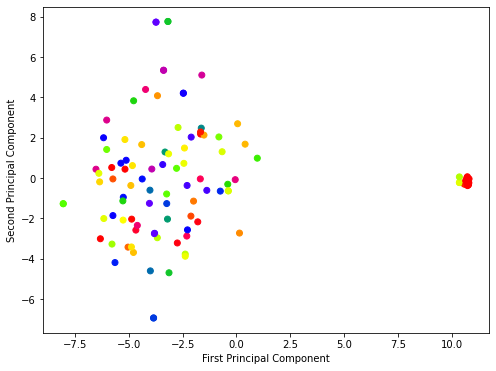

In [26]:
plt.figure(figsize =(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = dist_matrix[0], cmap ='prism')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<AxesSubplot:>

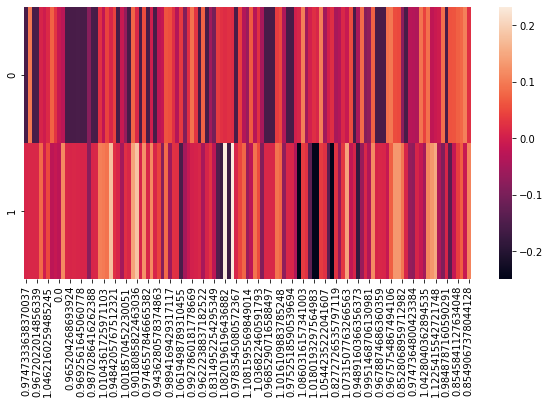

In [27]:
pca.components_

df_comp = pd.DataFrame(pca.components_, columns = distances[9])
 
plt.figure(figsize =(10, 5))
 
# plotting heatmap
sns.heatmap(df_comp)

In [28]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.33494674 0.05760938]

 Total Variance Explained: 39.26
